# Importar librerias necesarias!

In [2]:
import os
import PIL
import PIL.Image
import numpy as np

In [3]:
!pip install -U insightface -q
!pip install onnxruntime -q
from insightface.app import FaceAnalysis

# Dataset prueba

In [4]:
# dataset_prueba
!wget "https://www.dropbox.com/scl/fi/b9y03enpi01zfb36ckyir/personas.zip?rlkey=19wypqmaps5b5n28bz3gi7xg7&st=s6p3564g&dl=0" -O personas.zip

--2025-10-06 09:42:39--  https://www.dropbox.com/scl/fi/b9y03enpi01zfb36ckyir/personas.zip?rlkey=19wypqmaps5b5n28bz3gi7xg7&st=s6p3564g&dl=0
Resolviendo www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Conectando con www.dropbox.com (www.dropbox.com)[2620:100:601d:18::a27d:512]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://ucef630b8614719fb26faaed9be6.dl.dropboxusercontent.com/cd/0/inline/CyuW03w8d-89TOwE3pQgv0kIEkXIRBZ284vQpuSb6HJY6cLSv7HedLkPTKpK3JWRV8rqeVQIRFn6QMrv668C5I45J0_dIALF65UYuQgVBHF4JxKnWI3FvoOeOvCt0smEnUoRBslOEQhyf6T7Sei3_Vzj/file# [siguiendo]
--2025-10-06 09:42:41--  https://ucef630b8614719fb26faaed9be6.dl.dropboxusercontent.com/cd/0/inline/CyuW03w8d-89TOwE3pQgv0kIEkXIRBZ284vQpuSb6HJY6cLSv7HedLkPTKpK3JWRV8rqeVQIRFn6QMrv668C5I45J0_dIALF65UYuQgVBHF4JxKnWI3FvoOeOvCt0smEnUoRBslOEQhyf6T7Sei3_Vzj/file
Resolviendo ucef630b8614719fb26faaed9be6.dl.dropboxusercontent.com (ucef630b8614719fb26faaed9be6.dl.d

In [5]:
!unzip personas.zip

Archive:  personas.zip
replace personas/barack/face_2.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [90]:
# leemos la lista de personalidades del dataset junto a un número reducido de fotos
datapath = 'personas/'
ffaces = os.path.join(datapath, 'faces.txt')
fdata = []
dnames = {}
with open(ffaces) as f:
  for line in f :
    ipath, icl = line.split()
    ipath = os.path.join(datapath, ipath)
    fdata.append({'path': ipath, 'name': icl, 'emb': []})
    if icl not in dnames:
        dnames[icl] = len(dnames)
print(dnames)

{'paulina': 0, 'dicaprio': 1, 'barack': 2, 'pancho': 3, 'thalia': 4, 'mario': 5, 'michelle': 6}


In [ ]:
datapath = 'personas/familia_rs'
ffaces = os.path.join(datapath, 'faces.txt')
fdata = []
dnames = {}
with open(ffaces) as f:
  for line in f :
    ipath, icl = line.split()
    ipath = os.path.join(datapath, ipath)
    fdata.append({'path': ipath, 'name': icl, 'emb': []})
    if icl not in dnames:
        dnames[icl] = len(dnames)
print(dnames)

In [130]:
print(fdata)


[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': array([-1.14265546e-01, -1.05881763e+00,  5.88553905e-01, -1.10149038e+00,
        2.28365040e+00,  1.48630011e+00,  4.54847395e-01,  2.18558908e-01,
       -3.43301117e-01, -4.11670506e-01,  1.21416986e+00, -3.17530543e-01,
        4.95496660e-01, -1.34613454e-01,  4.13063139e-01, -1.26554918e+00,
       -2.13639665e+00,  7.08058476e-01,  2.27156878e-02, -3.92799109e-01,
        1.84956059e-01, -1.59472454e+00,  9.93286908e-01,  4.10958230e-01,
       -8.87074620e-02,  1.49143195e+00, -2.60809183e-01,  8.44307959e-01,
        1.00114298e+00, -1.78383958e+00,  6.90111518e-01,  1.36535883e-01,
        1.82030901e-01, -1.11316919e+00,  3.20333809e-01, -3.00474465e-04,
        4.03422773e-01,  2.50832605e+00,  3.09862942e-01,  3.11894529e-02,
        7.45211899e-01, -9.59180236e-01,  5.04101992e-01, -1.23452079e+00,
       -1.57055092e+00,  2.34042183e-01, -6.02753043e-01, -1.27724695e+00,
       -8.81775618e-01,  5.5575

# Modelo y Embbedings

## ModelZoo InsightFace

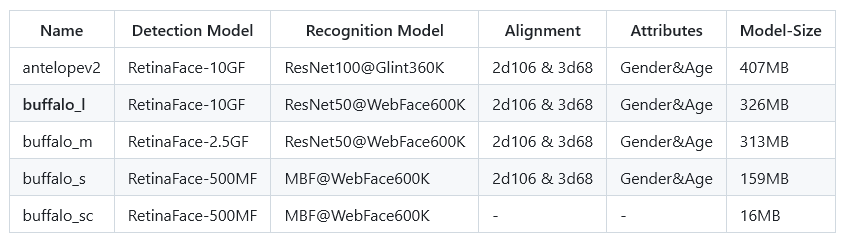![](
)

In [131]:
# Iniciamos el modelo de FaceRecognition
# BUFFALO_L -> https://github.com/deepinsight/insightface/tree/master/model_zoo

app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider'])  # Use 'CUDAExecutionProvider' for GPU
app.prepare(ctx_id=-1)  # ctx_id=-1 for CPU, 0 for GPU

/home/mbustamc/Documentos/diplomados/dia_2025/cc66t_reconocimiento-visual/cc66t_laboratorios/.venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:123: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mbustamc/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [93]:
# Get embeddings, con esto pasaremos una imagen por el modelo y guardaremos su embedding.
def get_face_embedding(image_path):
    """Extract face embedding from an image"""
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img = np.array(img)
    if img.shape[2] == 4:
      img = img[:,:,:-1]

    faces = app.get(img)
    if len(faces) < 1:
        raise ValueError("No faces detected in the image")
    if len(faces) > 1:
        print("Warning: Multiple faces detected. Using first detected face")

    # Retornar el embedding del primer rostro encontrado
    return faces[0].embedding

In [94]:
# Guardar el embedding para cada rostro en nuestra fdata.
compute = True
for person in fdata :
    print(person['path'])
    emb = get_face_embedding(person['path'])
    person['emb'] = emb

personas/paulina/paulina2.png
personas/paulina/paulina1.jpeg
personas/dicaprio/dicaprio_2.png
personas/dicaprio/dicaprio.jpg
personas/barack/barack.jpeg
personas/barack/barack_2.jpeg
personas/barack/face_2.jpeg
personas/pancho/pancho.jpeg
personas/pancho/pancho2.jpeg
personas/thalia/thalia1.jpg
personas/thalia/thalia2.jpg
personas/mario/mario1.png
personas/mario/mario2.png
personas/michelle/michelle_obama_1.jpeg
personas/michelle/michelle_obama_2.jpg


In [95]:
print(fdata)

[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': array([-1.14265546e-01, -1.05881763e+00,  5.88553905e-01, -1.10149038e+00,
        2.28365040e+00,  1.48630011e+00,  4.54847395e-01,  2.18558908e-01,
       -3.43301117e-01, -4.11670506e-01,  1.21416986e+00, -3.17530543e-01,
        4.95496660e-01, -1.34613454e-01,  4.13063139e-01, -1.26554918e+00,
       -2.13639665e+00,  7.08058476e-01,  2.27156878e-02, -3.92799109e-01,
        1.84956059e-01, -1.59472454e+00,  9.93286908e-01,  4.10958230e-01,
       -8.87074620e-02,  1.49143195e+00, -2.60809183e-01,  8.44307959e-01,
        1.00114298e+00, -1.78383958e+00,  6.90111518e-01,  1.36535883e-01,
        1.82030901e-01, -1.11316919e+00,  3.20333809e-01, -3.00474465e-04,
        4.03422773e-01,  2.50832605e+00,  3.09862942e-01,  3.11894529e-02,
        7.45211899e-01, -9.59180236e-01,  5.04101992e-01, -1.23452079e+00,
       -1.57055092e+00,  2.34042183e-01, -6.02753043e-01, -1.27724695e+00,
       -8.81775618e-01,  5.5575

# Comparación "todos contra todos"

In [96]:
# Crear una matriz de los embeddings que ya tenemos
# N Filas (personas) por 512 de la dimension del embedding. (persona por embedding)

embs = []
idnames = []
n = len(fdata)
dim = len(fdata[0]['emb'])
embs = np.zeros((n, dim), dtype = np.float32)

for i, person in enumerate(fdata):
  # print(i, person)
  embs[i, :] = person['emb']
  idnames.append(dnames[person['name']])

In [97]:
print(embs.shape)

(15, 512)


In [98]:
idnames

[0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]

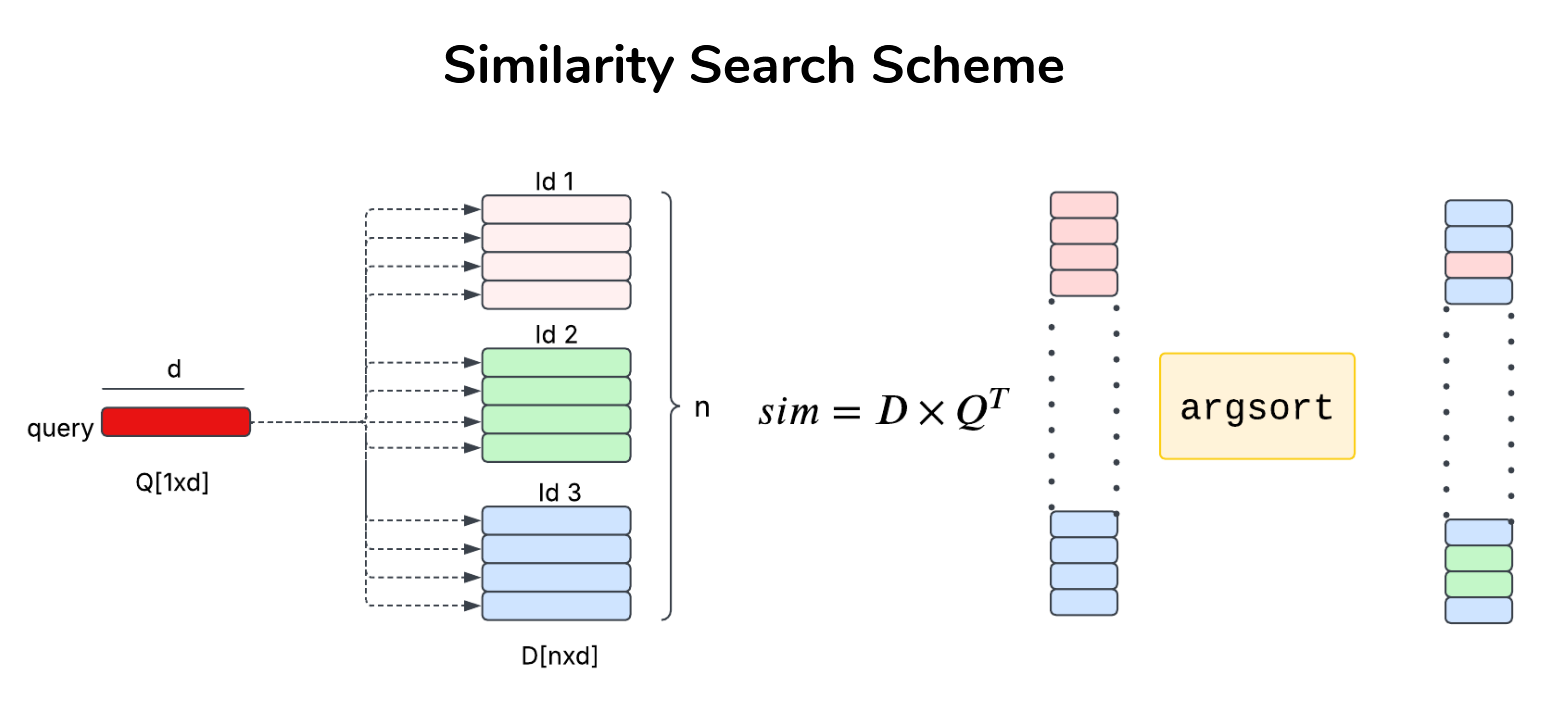

In [99]:
# Similarity Search -- Aplicamos producto punto todos contra todos

# normalizar los embedding ->   embedding / L2 norm (norma Euclideana)
embs_norm = embs / np.linalg.norm(embs, ord = 2, axis = 1,  keepdims = True)
# (It scales each embedding vector so that its length (magnitude) becomes 1)

sim = embs_norm @ np.transpose(embs_norm)


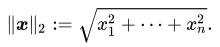

In [100]:
print(sim)

[[ 1.0000000e+00  6.2091148e-01  1.4419974e-01  1.1881724e-01
  -4.3928705e-02 -4.2916708e-02 -4.6245165e-02  1.0602462e-01
   6.0486905e-02 -9.2999907e-03  1.1417773e-01  4.8244365e-02
   1.9483801e-02  1.1305122e-01  1.2899187e-01]
 [ 6.2091148e-01  1.0000000e+00  1.5393433e-01  9.2735447e-02
  -8.4229112e-02 -4.6397049e-02 -1.9339167e-02  1.1954491e-01
   7.1693614e-02  2.9089380e-02  1.3622121e-02  2.8045475e-04
  -1.1759914e-02  3.0222097e-03 -4.5506060e-03]
 [ 1.4419974e-01  1.5393433e-01  1.0000001e+00  8.2802188e-01
   8.7306745e-02  6.2302578e-02  1.0194063e-01  1.7433237e-02
  -4.6713978e-02 -5.9806012e-02 -7.4942425e-02  4.4832777e-02
   1.9818639e-02  1.1826560e-01  1.4005813e-01]
 [ 1.1881724e-01  9.2735447e-02  8.2802188e-01  1.0000000e+00
   1.2986918e-01  3.9691798e-02  1.3073254e-01  1.6856942e-02
  -5.3042419e-02 -8.2204491e-02 -7.5398922e-02  3.7840158e-02
   6.8672374e-04  3.6277410e-02  6.2857181e-02]
 [-4.3928705e-02 -8.4229112e-02  8.7306745e-02  1.2986918e-01
  

In [101]:
print(np.diag(sim))

[1.         1.         1.0000001  1.         1.0000004  1.
 0.9999997  0.9999998  1.         0.9999999  0.99999976 0.99999976
 0.99999976 0.9999997  0.9999999 ]


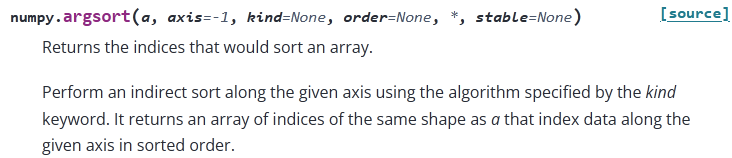

In [102]:
# Ordenamos por fila, de mayor a  menor similitud
# np.argsort() ordena en forma ascendente, por lo tanto, el de mayor similud quedaria al fondo.
#   debemos ordenar el "negativo" de la matriz, para poder darla vuelto.

idx_sort =  np.argsort(-sim, axis = 1)
print(idx_sort)


[[ 0  1  2 14  3 10 13  7  8 11 12  9  5  4  6]
 [ 1  0  2  7  3  8  9 10 13 11 14 12  6  5  4]
 [ 2  3  1  0 14 13  6  4  5 11 12  7  8  9 10]
 [ 3  2  6  4  0  1 14  5 11 13  7 12  8 10  9]
 [ 4  6  5  3  2  7  9 10  8 11 12 13  0 14  1]
 [ 5  6  4  2 14  3 13  9 10 11  7 12  8  0  1]
 [ 6  5  4  3  2 13  9 11 10 12 14  7  1  0  8]
 [ 7  8  1  0  4 13  2  3  9  6  5 11 14 10 12]
 [ 8  7  1  0  4  9 14 10 13 11  5  2  3  6 12]
 [ 9 10 14 13  4  6  5  1  8  7  0 11 12  2  3]
 [10  9  0 14  4  6 13  5  1  8 11 12  7  2  3]
 [11 12  0  2  6  3  4  1  5  7 13 10  8  9 14]
 [12 11  6  2  0  4  3  1  5  9 13 10  7 14  8]
 [13 14  2  0  9  6 10  3  5  7  1 11  8  4 12]
 [14 13  2  9  0 10  3  5  6  1  8  4  7 11 12]]


In [103]:
# Mostramos los nombres de los más similares para cada imagen
for idx, row in enumerate(idx_sort) :
    name_query = fdata[idx]['name']
    print('Query Name = {}'.format(name_query))
    result = [(fdata[i]['name'], sim[idx, i]) for i in row[1:5] ]
    print(result)


Query Name = paulina
[('paulina', np.float32(0.6209115)), ('dicaprio', np.float32(0.14419974)), ('michelle', np.float32(0.12899187)), ('dicaprio', np.float32(0.11881724))]
Query Name = paulina
[('paulina', np.float32(0.6209115)), ('dicaprio', np.float32(0.15393433)), ('pancho', np.float32(0.11954491)), ('dicaprio', np.float32(0.09273545))]
Query Name = dicaprio
[('dicaprio', np.float32(0.8280219)), ('paulina', np.float32(0.15393433)), ('paulina', np.float32(0.14419974)), ('michelle', np.float32(0.14005813))]
Query Name = dicaprio
[('dicaprio', np.float32(0.8280219)), ('barack', np.float32(0.13073254)), ('barack', np.float32(0.12986918)), ('paulina', np.float32(0.11881724))]
Query Name = barack
[('barack', np.float32(0.70025647)), ('barack', np.float32(0.69845605)), ('dicaprio', np.float32(0.12986918)), ('dicaprio', np.float32(0.087306745))]
Query Name = barack
[('barack', np.float32(0.7008226)), ('barack', np.float32(0.69845605)), ('dicaprio', np.float32(0.06230258)), ('michelle', np.f

# Visualización del espacio

In [104]:
# Visualizar el espacio

import umap.umap_ as umap
import matplotlib
import matplotlib.pyplot as plt

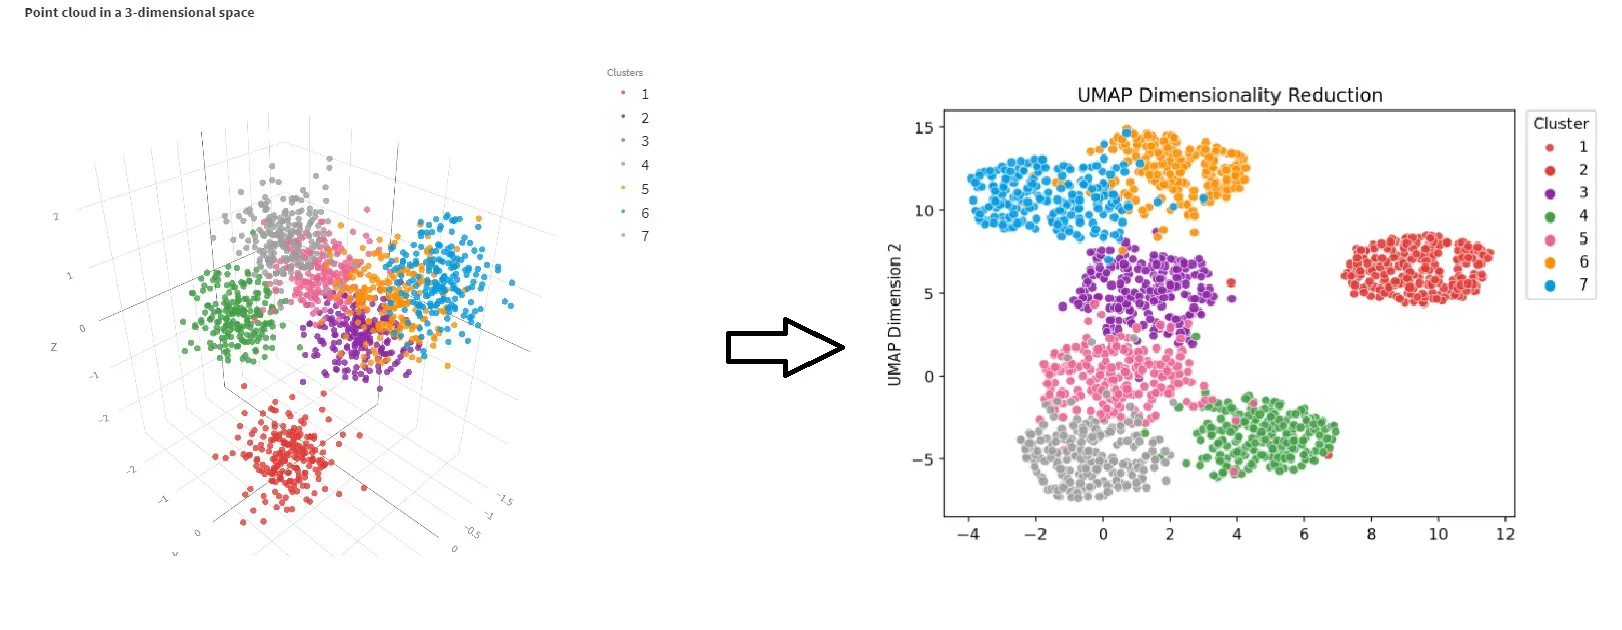

In [105]:
reducer = umap.UMAP(n_neighbors=2)
embeddings = reducer.fit_transform(embs)


/home/mbustamc/Documentos/diplomados/dia_2025/cc66t_reconocimiento-visual/cc66t_laboratorios/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [106]:
embeddings

array([[ 1.0710591 ,  1.8546687 ],
       [ 1.2487185 ,  1.6748363 ],
       [ 9.019223  , 15.5462475 ],
       [ 9.312608  , 15.252855  ],
       [20.511625  , -3.257448  ],
       [20.798306  , -2.968963  ],
       [20.340528  , -3.4282384 ],
       [ 3.6810243 ,  8.893415  ],
       [ 3.903208  ,  9.116295  ],
       [ 5.4242167 ,  3.5052388 ],
       [ 5.131418  ,  3.2192771 ],
       [-4.2894173 , 24.328869  ],
       [-4.1635327 , 24.20299   ],
       [ 9.197373  ,  0.6547565 ],
       [ 9.413101  ,  0.43897137]], dtype=float32)

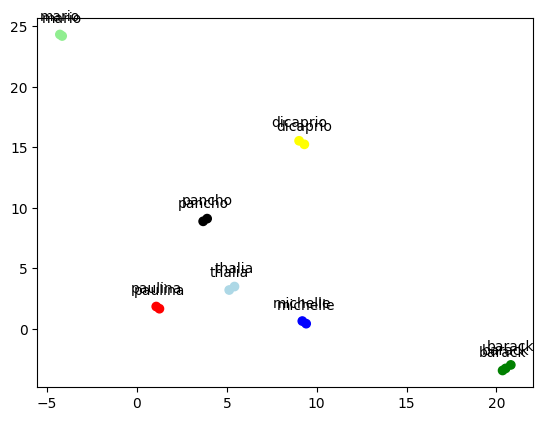

In [107]:
colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue']
plt.scatter(embeddings[:, 0], embeddings[:, 1], c = idnames, cmap=matplotlib.colors.ListedColormap(colors))

unique_names = list(dnames.keys())
for i, txt in enumerate(idnames):
    plt.annotate(unique_names[txt], (embeddings[i, 0], embeddings[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Comparacion de nueva imagen!

In [108]:
image_marco_01 = 'personas/familia_rs/marco_01.jpg'

image_marco_01_embedding = get_face_embedding(image_marco_01)

In [132]:
def new_data(filename='familiares_01.txt', dnames=dnames, idnames=idnames, fdata=fdata):
    ffaces_familia = os.path.join(datapath, filename)
    with open(ffaces_familia) as file:
        for line in file:
            ipath, icl = line.split()
            ipath = os.path.join(datapath, ipath)
            emb = get_face_embedding(ipath)
            fdata.append({'path': ipath, 'name': icl, 'emb': emb})
            if icl not in dnames:
                dnames[icl] = len(dnames)
                idnames.append(dnames[icl])


    return


new_data('familiares_01.txt', dnames=dnames, idnames=idnames, fdata=fdata)
print('--------------------------------------')
print(dnames)
print('--------------------------------------')
print(idnames)
print('--------------------------------------')
print(fdata)

--------------------------------------
{'paulina': 0, 'dicaprio': 1, 'barack': 2, 'pancho': 3, 'thalia': 4, 'mario': 5, 'michelle': 6, 'july': 7, 'igor': 8, 'marco': 9}
--------------------------------------
[0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 8, 8]
--------------------------------------
[{'path': 'personas/paulina/paulina2.png', 'name': 'paulina', 'emb': array([-1.14265546e-01, -1.05881763e+00,  5.88553905e-01, -1.10149038e+00,
        2.28365040e+00,  1.48630011e+00,  4.54847395e-01,  2.18558908e-01,
       -3.43301117e-01, -4.11670506e-01,  1.21416986e+00, -3.17530543e-01,
        4.95496660e-01, -1.34613454e-01,  4.13063139e-01, -1.26554918e+00,
       -2.13639665e+00,  7.08058476e-01,  2.27156878e-02, -3.92799109e-01,
        1.84956059e-01, -1.59472454e+00,  9.93286908e-01,  4.10958230e-01,
       -8.87074620e-02,  1.49143195e+00, -2.60809183e-01,  8.44307959e-01,
        1.00114298e+00,

In [110]:
image_marco_01_emb_norm = image_marco_01_embedding / np.linalg.norm(image_marco_01_embedding, ord=2)
similarity_scores_marco_01 = image_marco_01_emb_norm @ np.transpose(embs_norm)

In [147]:
def new_embeddings(idnames=idnames, fdata=fdata):
    embs_new = []
    n = len(fdata)
    dim = len(fdata[0]['emb'])
    embs_new = np.zeros((n, dim), dtype = np.float32)

    for i, person in enumerate(fdata):
        embs_new[i, :] = person['emb']
        idnames.append(dnames[person['name']])
    return embs_new

def new_similarity(embs_new, embs_norm = embs_norm):
    similarity_new = []
    for image in embs_new:
        embs_new_norm = image / np.linalg.norm(image, ord = 2, keepdims = True)
        similarity_new.append(embs_new_norm @ np.transpose(embs_norm))
    return similarity_new

def new_similarity_detail(similarity_matriz):
    for similarity in similarity_matriz.rows:
        print(similarity)
        for i in range(len(similarity)):
            person_name = fdata[i]['name']
            similarity = similarity[i]
            print("Name: {}, Similarity: {:.4f}".format(person_name, similarity))
#imilarity_familia_01 = new_similarity(embs_familia_01, idnames_familia_01)
#rint(similarity_familia_01)


embs_new = new_embeddings(idnames, fdata)
similarity_new = new_similarity(embs_new)
new_similarity_single(similarity_new)

print(dnames)
print('--------------------------------------')
print(idnames)
print('--------------------------------------')
print(embs_familia_01.shape)
print(len(similarity_new))


Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Similarity: 0.0518
Name: michelle, Simi

In [112]:
similarity_scores_marco_01 = image_marco_01_emb_norm @ np.transpose(embs_norm)

In [113]:
similarity_scores_marco_01

array([-0.06715588, -0.04765668,  0.00841962,  0.00891434,  0.06989508,
        0.10064198,  0.1015038 , -0.01980473, -0.05598464, -0.03204767,
       -0.05491481,  0.0093524 ,  0.02985606,  0.0220705 ,  0.05176053],
      dtype=float32)

In [114]:
idx_sort_marco_01 =  np.argsort(-similarity_scores_marco_01)
idx_sort_marco_01

array([ 6,  5,  4, 14, 12, 13, 11,  3,  2,  7,  9,  1, 10,  8,  0])

In [115]:
for i in idx_sort_marco_01:
    person_name = fdata[i]['name']
    similarity = similarity_scores_marco_01[i]
    print("Name: {}, Similarity: {:.4f}".format(person_name, similarity))

Name: barack, Similarity: 0.1015
Name: barack, Similarity: 0.1006
Name: barack, Similarity: 0.0699
Name: michelle, Similarity: 0.0518
Name: mario, Similarity: 0.0299
Name: michelle, Similarity: 0.0221
Name: mario, Similarity: 0.0094
Name: dicaprio, Similarity: 0.0089
Name: dicaprio, Similarity: 0.0084
Name: pancho, Similarity: -0.0198
Name: thalia, Similarity: -0.0320
Name: paulina, Similarity: -0.0477
Name: thalia, Similarity: -0.0549
Name: pancho, Similarity: -0.0560
Name: paulina, Similarity: -0.0672


ValueError: 'c' argument has 22 elements, which is inconsistent with 'x' and 'y' with size 16.

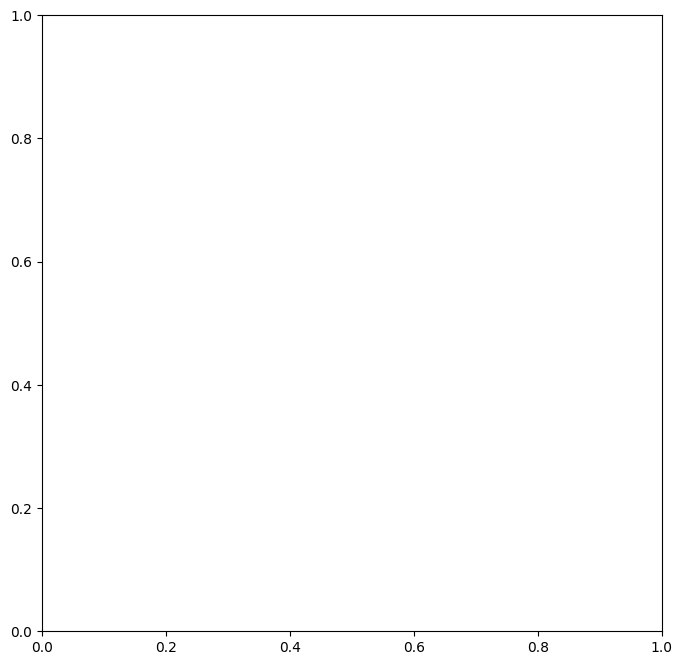

In [116]:
# calcular reductor
marco_01_emb_reducer = reducer.transform(image_marco_01_embedding.reshape(1, -1))
all_embeddings_reducer = np.vstack((embeddings, marco_01_emb_reducer))

# agregar marco como una id extra
if 'marco' not in dnames:
    dnames['marco'] = len(dnames)
all_idnames = idnames + [dnames['marco']]


plt.figure(figsize=(8, 8))
colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue', 'purple']
plt.scatter(all_embeddings_reducer[:, 0], all_embeddings_reducer[:, 1], c = all_idnames, cmap=matplotlib.colors.ListedColormap(colors))

unique_names = list(dnames.keys())
for i, txt in enumerate(all_idnames):
    plt.annotate(unique_names[txt], (all_embeddings_reducer[i, 0], all_embeddings_reducer[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Ahora revisamos consistencia en los resultados

In [ ]:
# mi foto anterior sera la ultima id nueva (15)
embs_norm_with_marco = np.vstack((embs_norm, image_marco_01_emb_norm))
embs_norm_with_marco.shape

(16, 512)

In [ ]:
image_marco_02 = 'personas/familia_rs/marco_02.jpg'
image_marco_02_embedding = get_face_embedding(image_marco_02)
image_marco_02_emb_norm = image_marco_02_embedding / np.linalg.norm(image_marco_02_embedding, ord=2)

In [ ]:
# calcular similarity de la segunda imagen 'marco' comparada con todas las anteriores
similarity_scores_marco_02 = image_marco_02_emb_norm @ np.transpose(embs_norm_with_marco)
# calculamos las ids de los resultados
idx_sort_marco_02 = np.argsort(-similarity_scores_marco_02)

In [ ]:
similarity_scores_marco_02

array([ 2.1835120e-02,  4.1582234e-02,  5.6299888e-02,  5.7384063e-02,
        3.7877023e-02,  3.8971402e-02,  3.1366866e-02,  1.1511641e-01,
        9.0222463e-02,  4.5086402e-02, -2.6150700e-04,  3.5551704e-02,
        1.9131571e-02,  1.2139542e-02,  5.5247858e-02,  6.0050231e-01],
      dtype=float32)

In [ ]:
idx_sort_marco_02

array([15,  7,  8,  3,  2, 14,  9,  1,  5,  4, 11,  6,  0, 12, 13, 10])

In [ ]:
for i in idx_sort_marco_02:
    similarity = similarity_scores_marco_02[i]
    print("Name: {}, Similarity: {:.4f}".format(i, similarity))

Name: 15, Similarity: 0.6005
Name: 7, Similarity: 0.1151
Name: 8, Similarity: 0.0902
Name: 3, Similarity: 0.0574
Name: 2, Similarity: 0.0563
Name: 14, Similarity: 0.0552
Name: 9, Similarity: 0.0451
Name: 1, Similarity: 0.0416
Name: 5, Similarity: 0.0390
Name: 4, Similarity: 0.0379
Name: 11, Similarity: 0.0356
Name: 6, Similarity: 0.0314
Name: 0, Similarity: 0.0218
Name: 12, Similarity: 0.0191
Name: 13, Similarity: 0.0121
Name: 10, Similarity: -0.0003


# Tener más de una persona en foto (?)


In [ ]:


# agregar marco como una id extra
if 'sole' not in dnames:
    dnames['sole'] = len(dnames)
all_idnames = idnames + [dnames['sole']]
image_sole_01 = 'personas/familia_rs/sole_01.jpg'
image_sole_02 = 'personas/familia_rs/sole_02.jpg'
image_sole_01_embedding = get_face_embedding(image_sole_01)
image_sole_01_emb_norm = image_sole_01_embedding / np.linalg.norm(image_sole_01_embedding, ord=2)
image_sole_02_embedding = get_face_embedding(image_sole_02)
image_sole_02_emb_norm = image_sole_02_embedding / np.linalg.norm(image_sole_02_embedding, ord=2)
# calcular similarity de la segunda imagen 'sole' comparada con todas las anteriores
similarity_scores_sole_01 = image_sole_01_emb_norm @ np.transpose(embs_norm)
similarity_scores_sole_02 = image_sole_02_emb_norm @ np.transpose(embs_norm)
similarity_scores_sole_01
similarity_scores_sole_02
# calculamos las ids de los resultados
idx_sort_sole_01 = np.argsort(-similarity_scores_sole_01)
idx_sort_sole_02 = np.argsort(-similarity_scores_sole_02)
sole_01_emb_reducer = reducer.transform(image_sole_01_embedding.reshape(1, -1))
sole_02_emb_reducer = reducer.transform(image_sole_02_embedding.reshape(1, -1))
all_embeddings_reducer = np.vstack((embeddings, sole_01_emb_reducer, sole_02_emb_reducer, marco_01_emb_reducer))

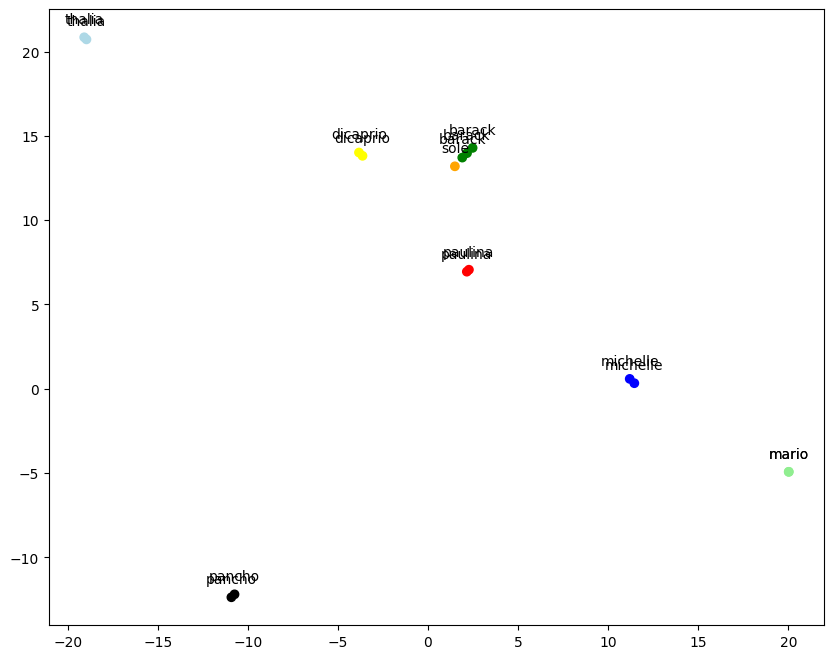

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Asegura consistencia de longitud
min_len = min(len(all_embeddings_reducer), len(all_idnames))

# Dibuja con IDs convertidos a enteros
plt.figure(figsize=(10, 8))
colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue', 'purple', 'orange']

plt.scatter(
    all_embeddings_reducer[:min_len, 0],
    all_embeddings_reducer[:min_len, 1],
    c=np.array(all_idnames[:min_len], dtype=int),
    cmap=matplotlib.colors.ListedColormap(colors)
)

# Agregar nombres
unique_names = list(dnames.keys())
for i in range(min_len):
    plt.annotate(unique_names[int(all_idnames[i])],
                 (all_embeddings_reducer[i, 0], all_embeddings_reducer[i, 1]),
                 textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


In [ ]:
# Function to get embeddings of all faces in an image
def get_all_face_embeddings(image_path):
    """Extract face embeddings from all faces in an image"""
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img = np.array(img)
    if img.shape[2] == 4:
      img = img[:,:,:-1]

    faces = app.get(img)
    if len(faces) < 1:
        print("No faces detected in the image")
        return []

    # Return embeddings for all detected faces
    return [face.embedding for face in faces]

In [ ]:
# Get embeddings for all faces in imagen_familia.jpg

family_image_path = 'personas/familia_rs/multiple_01.jpg'
family_face_embeddings = get_all_face_embeddings(family_image_path)

print(f"Detected {len(family_face_embeddings)} faces in {family_image_path}")

Detected 2 faces in personas/familia_rs/multiple_01.jpg


In [ ]:
print(len(family_face_embeddings),len(family_face_embeddings[0]))

2 512


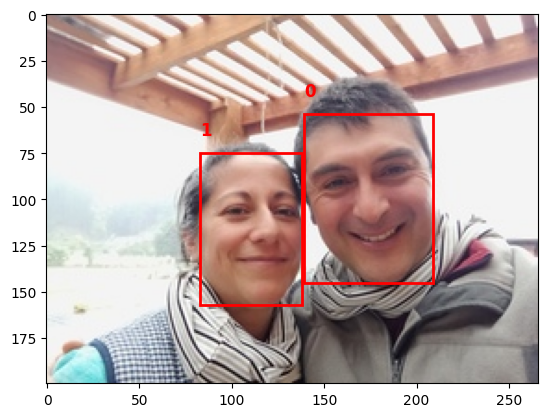

In [ ]:
import matplotlib.patches as patches
def plot_faces_with_bboxes(image_path):
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img_np = np.array(img)
    if img_np.shape[2] == 4:
      img_np = img_np[:,:,:-1]

    faces = app.get(img_np)
    fig, ax = plt.subplots(1)
    ax.imshow(img_np)

    if len(faces) < 1:
        print("No faces detected in the image")
        plt.show()
        return

    for i, face in enumerate(faces):
        # bounding box coordinates
        bbox = face.bbox.astype(int)
        x, y, w, h = bbox[0], bbox[1], bbox[2]-bbox[0], bbox[3]-bbox[1]

        # rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # index label
        plt.text(x, y - 10, str(i), color='red', fontsize=12, weight='bold')
    plt.show()

# plot the family image with bounding boxes
plot_faces_with_bboxes(family_image_path)

In [ ]:
# normalize the family face embeddings
family_face_embeddings_norm = np.array([emb / np.linalg.norm(emb, ord=2) for emb in family_face_embeddings])

# reshape image_marco_01_embedding to be a column vector for matrix multiplication
similarity_scores_family_marco = family_face_embeddings_norm @ image_marco_01_embedding.reshape(-1, 1)
print(similarity_scores_family_marco)


# reshape image_marco_01_embedding to be a column vector for matrix multiplication
similarity_scores_family_sole = family_face_embeddings_norm @ image_sole_01_embedding.reshape(-1, 1)
print(similarity_scores_family_sole)

[[16.995274]
 [-0.695383]]
[[ 0.2808057]
 [20.172262 ]]
